# PA KELOMPOK 1 KECERDASAN BUATAN

### NAMA ANGGOTA KELOMPOK : 
### - Hadie Pratama Tulili
### - Rafi Izdihar
### - Muhammad Firdaus

# 1.Tujuan

1. Untuk mengaplikasikan Convolutional Neural Networks (CNN) untuk memprediksi tipe kue khas indonesia.

2. Untuk mengklasifikasikan setiap gambar kue ke salah satu dari 8 kategori : 
    **kue_risoles, kue_lumpur, kue_kastengel, kue_dadar_gulung, kue_putri_salju, kue_klepon,kue_serabi, kue_lapis**
    
3. Jumlah data training yang digunakan sebesar ??? sampel, jumlah data testing sebesar ??? sampel serta jumlah data validation sebesar ??? sampel.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# directory list
main_path = './dataset/train/'
test_path = './dataset/test/'

In [3]:
#Training
train = tf.keras.utils.image_dataset_from_directory(main_path,
                                                            batch_size=32,
                                                            validation_split = 0.3,
                                                            subset = 'training',
                                                            seed = 1,                                                            
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)

#Validation
validation = tf.keras.utils.image_dataset_from_directory(main_path,
                                                            batch_size=32,
                                                            validation_split = 0.3,
                                                            subset = 'validation',
                                                            seed = 1,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)


#Testing
test = tf.keras.utils.image_dataset_from_directory(test_path,
                                                            batch_size=32,
                                                            image_size=(128, 128),
                                                            labels='inferred',
                                                            label_mode='categorical',
                                                            shuffle=True)                                                            

Found 1522 files belonging to 8 classes.
Using 1066 files for training.
Found 1522 files belonging to 8 classes.
Using 456 files for validation.
Found 162 files belonging to 8 classes.


In [4]:
# class names
class_names = train.class_names
class_names

['kue_dadar_gulung',
 'kue_kastengel',
 'kue_klepon',
 'kue_lapis',
 'kue_lumpur',
 'kue_putri_salju',
 'kue_risoles',
 'kue_serabi']

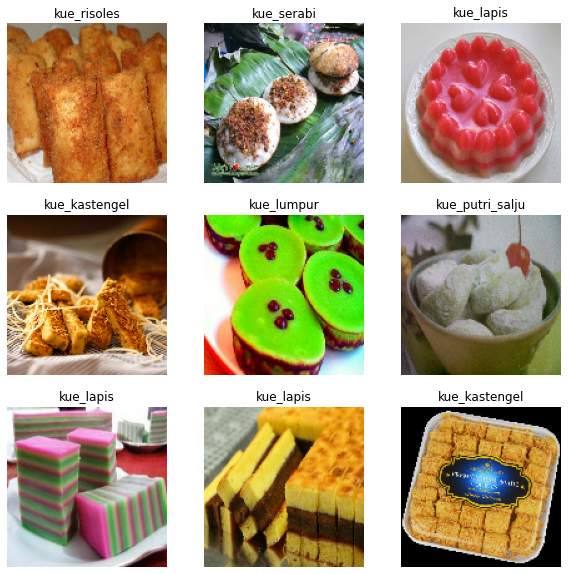

In [5]:
# data visualization
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")

In [6]:
trainTemp = train.unbatch()
labels = []
for x, y in trainTemp:
    index = np.argmax(y)
    labels.append(class_names[index])

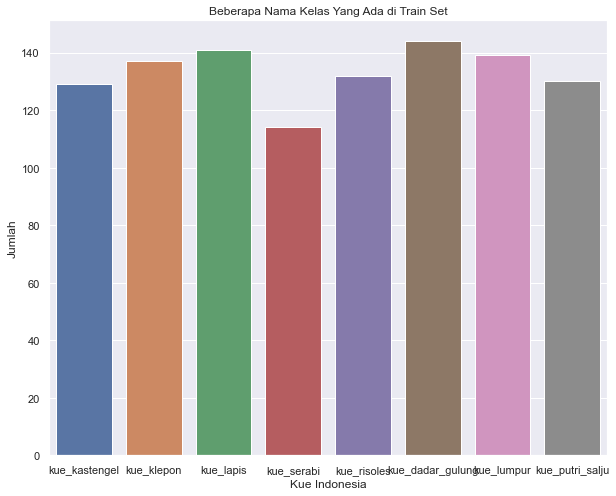

In [7]:
plt.figure(figsize=(10, 8))

sns.set_theme()


sns.countplot(x=labels)
plt.xlabel('Kue Indonesia')
plt.ylabel('Jumlah')
plt.title('Beberapa Nama Kelas Yang Ada di Train Set')
plt.show()

In [8]:
#Normalisasi
def normalize_img(image, label):
  return tf.cast(image, tf.float32)/255 , label

#Tambah tingkat keterangan
def random_brightness(image, label):
  return tf.image.random_brightness(image,max_delta=0.8), label

In [9]:
train = train.map(normalize_img).map(random_brightness)
validation = validation.map(normalize_img)
test = test.map(normalize_img)

In [10]:
model = tf.keras.Sequential([

tf.keras.layers.Conv2D(128, (3,3), activation='relu',input_shape=[128, 128, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.4),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(8, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [12]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])

In [13]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
)

In [14]:
hasil = model.fit(train, epochs=30,validation_data=validation,verbose=1,callbacks=[earlyStopping])

Epoch 1/30
34/34 [==============================] - 79s 2s/step - loss: 2.0927 - accuracy: 0.1182 - val_loss: 1.9676 - val_accuracy: 0.1776
Epoch 2/30
34/34 [==============================] - 67s 2s/step - loss: 1.8986 - accuracy: 0.2411 - val_loss: 1.8421 - val_accuracy: 0.1996
Epoch 3/30
34/34 [==============================] - 48s 1s/step - loss: 1.8296 - accuracy: 0.2683 - val_loss: 1.7986 - val_accuracy: 0.3136
Epoch 4/30
34/34 [==============================] - 63s 2s/step - loss: 1.7575 - accuracy: 0.3002 - val_loss: 1.7553 - val_accuracy: 0.3662
Epoch 5/30
34/34 [==============================] - 72s 2s/step - loss: 1.5946 - accuracy: 0.3837 - val_loss: 1.6626 - val_accuracy: 0.3596
Epoch 6/30
34/34 [==============================] - 75s 2s/step - loss: 1.5343 - accuracy: 0.4278 - val_loss: 1.7116 - val_accuracy: 0.2654
Epoch 7/30
34/34 [==============================] - 72s 2s/step - loss: 1.4740 - accuracy: 0.4296 - val_loss: 1.6458 - val_accuracy: 0.3596
Epoch 8/30
34/34 [==

In [15]:
test_evaluate = model.evaluate(test, verbose=0)
print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {test_evaluate[1]}')

Test loss     : 1.909110188484192
Test accuracy : 0.5802469253540039


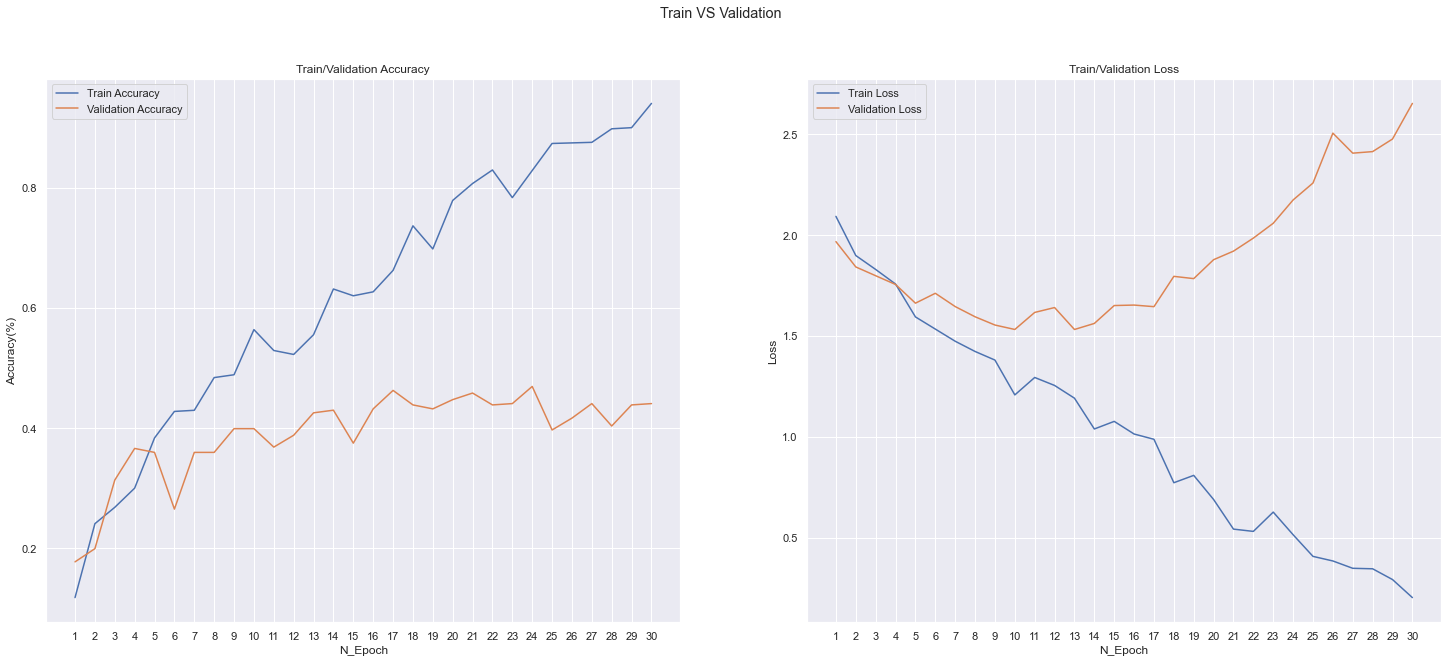

In [16]:
epoch = [i+1 for i in range(30)]


plt.figure(figsize=(25, 10))
plt.suptitle('Train VS Validation')

#Subplot Akurasi
plt.subplot(1,2,1)
sns.lineplot(x=epoch,y = hasil.history['accuracy'],label ='Train Accuracy')
sns.lineplot(x=epoch,y = hasil.history['val_accuracy'],label ='Validation Accuracy')

plt.xticks(epoch)
plt.ylabel('Accuracy(%)')
plt.xlabel('N_Epoch')
plt.title("Train/Validation Accuracy")

#Subplot Loss
plt.subplot(1,2,2)
sns.lineplot(x=epoch,y = hasil.history['loss'],label ='Train Loss')
sns.lineplot(x=epoch,y = hasil.history['val_loss'],label ='Validation Loss')

plt.xticks(epoch)
plt.title("Train/Validation Loss")
plt.xlabel('N_Epoch')
plt.ylabel('Loss')
plt.show()

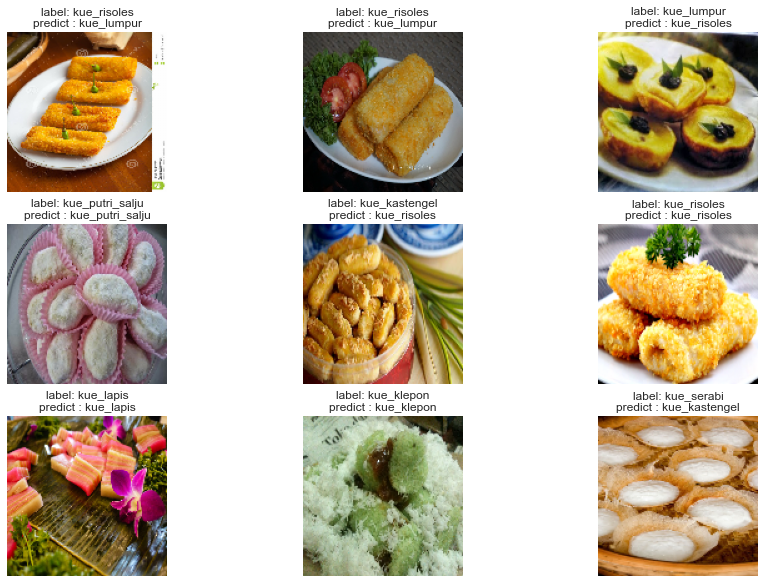

In [17]:
image ,label = next(iter(test))


plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')

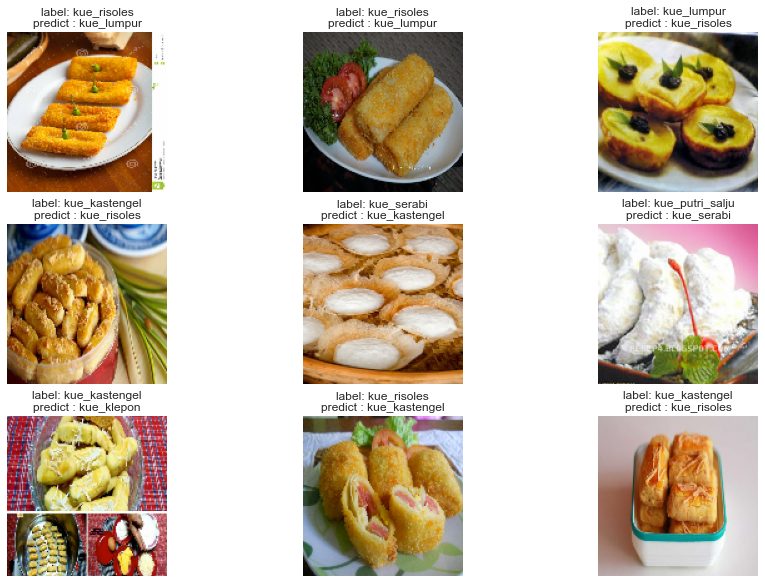

In [18]:
#Plot prediction Error
plt.figure(figsize=(15,10))

i = 0
j = 0
while (j < 9):
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,j+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))

    if (TrueLabel != class_names[y_pred]):
        plt.imshow(tf.squeeze(image[i]),cmap='gray')
        plt.title(f'label: {TrueLabel}\npredict : {class_names[y_pred]}')
        j+=1
    i+=1

In [19]:
test_pred = model.predict(test)
test_pred_labes = np.argmax(test_pred,axis = 1)
test_labels1 = np.concatenate([y for x, y in test], axis=0)
test_labels = [np.argmax(y) for y in test_labels1]

6/6 [==============================] - 3s 339ms/step


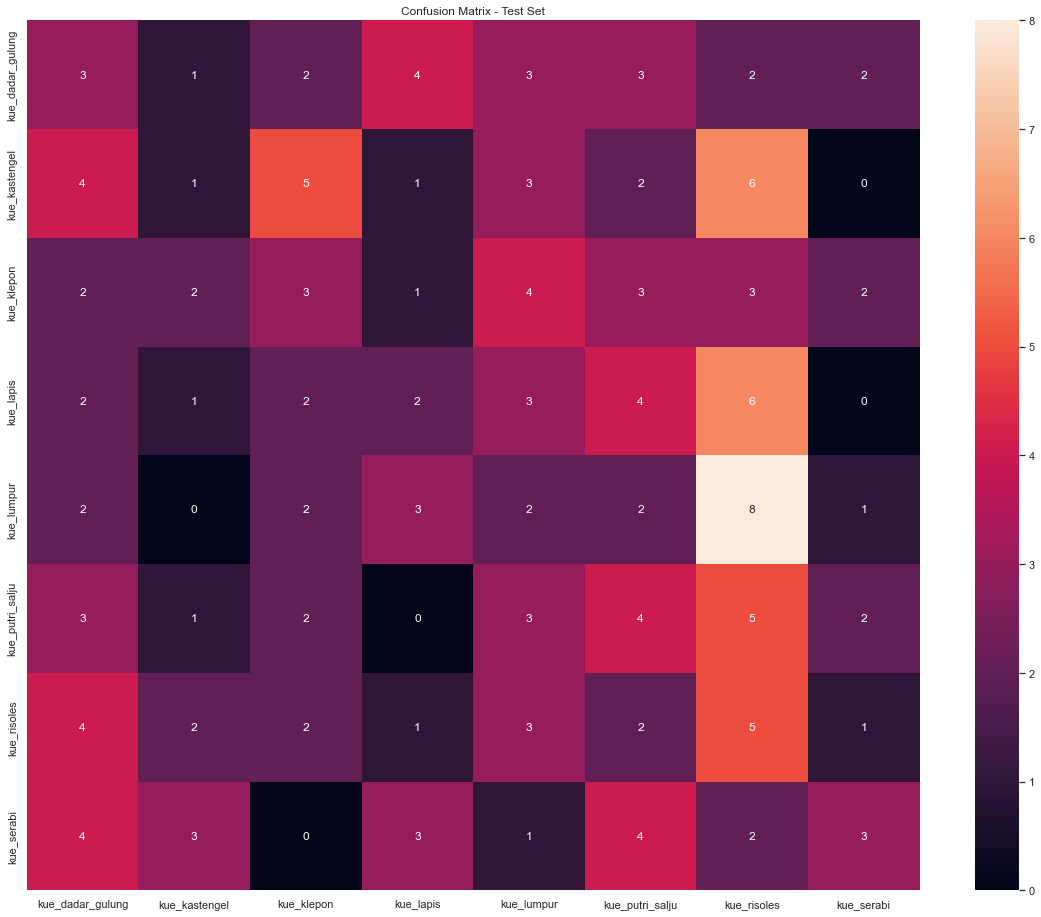

In [20]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_labels,test_pred_labes)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_names,yticklabels=class_names)
plt.title("Confusion Matrix - Test Set")
plt.show()

In [21]:
#Classification Report
print('Classification Report')
print(classification_report(test_pred_labes, test_labels, target_names=class_names))

Classification Report
                  precision    recall  f1-score   support

kue_dadar_gulung       0.15      0.12      0.14        24
   kue_kastengel       0.05      0.09      0.06        11
      kue_klepon       0.15      0.17      0.16        18
       kue_lapis       0.10      0.13      0.11        15
      kue_lumpur       0.10      0.09      0.10        22
 kue_putri_salju       0.20      0.17      0.18        24
     kue_risoles       0.25      0.14      0.18        37
      kue_serabi       0.15      0.27      0.19        11

        accuracy                           0.14       162
       macro avg       0.14      0.15      0.14       162
    weighted avg       0.16      0.14      0.15       162

